In [1]:
import librosa
import scipy
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

def extract_features(S, sr):
    
    if S.shape[0] > 92585:
        S = S[:92585]
    else:
        S = np.pad(S, (0, 92585-S.shape[0]), 'constant')
    
    S_spectrogram = librosa.feature.melspectrogram(y=S, sr=sr, n_mels=128)  # spectrogram features
    S = librosa.power_to_db(S_spectrogram)
    S = scipy.fftpack.dct(S, axis=0, type=2, norm='ortho')[:12]  # MFCC features
    
    S_delta = librosa.feature.delta(S)
    S_delta2 = librosa.feature.delta(S, order=2)
    
    S = np.vstack([S_spectrogram, S_delta, S_delta2])     
    
    return S


In [2]:
hap_wav_vector, _sr = librosa.load('data/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro03/Ses01F_impro03_F000.wav', sr=16000)
hap = extract_features(hap_wav_vector, _sr)
ang_wav_vector, _sr = librosa.load('data/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro05/Ses01F_impro05_F008.wav', sr=16000)
ang = extract_features(ang_wav_vector, _sr)
sad_wav_vector, _sr = librosa.load('data/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro02/Ses01F_impro02_F000.wav', sr=16000)
sad = extract_features(sad_wav_vector, _sr)
neu_wav_vector, _sr = librosa.load('data/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav', sr=16000)
neu = extract_features(neu_wav_vector, _sr)

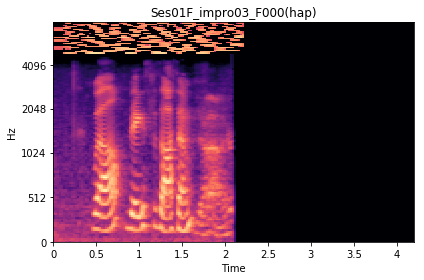

<Figure size 432x288 with 0 Axes>

In [4]:
librosa.display.specshow(librosa.power_to_db(hap,ref=np.max), y_axis='mel', fmax=8000,x_axis='time')
plt.title('Ses01F_impro03_F000(hap)')
plt.tight_layout()
plt.show()

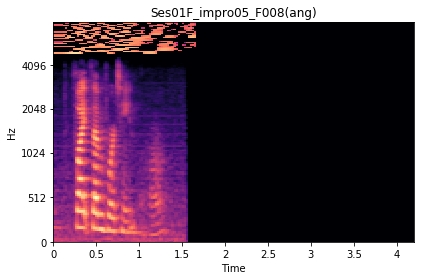

In [4]:
librosa.display.specshow(librosa.power_to_db(ang,ref=np.max), y_axis='mel', fmax=8000,x_axis='time')
plt.title('Ses01F_impro05_F008(ang)')
plt.tight_layout()
plt.show()

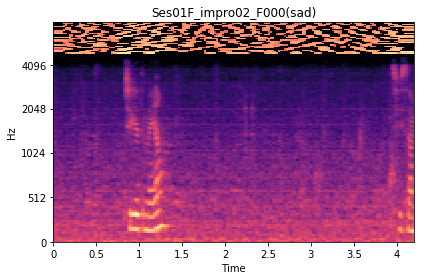

In [5]:
librosa.display.specshow(librosa.power_to_db(sad,ref=np.max), y_axis='mel', fmax=8000,x_axis='time')
plt.title('Ses01F_impro02_F000(sad)')
plt.tight_layout()
plt.show()

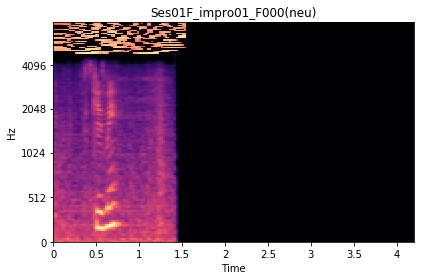

In [6]:
librosa.display.specshow(librosa.power_to_db(neu,ref=np.max), y_axis='mel', fmax=8000,x_axis='time')
plt.title('Ses01F_impro01_F000(neu)')
plt.tight_layout()
plt.show()